# Interpreting the model

In this notebook, both the features and the materials are investigated simultaneously to try to interpret the model.

***

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## Importing Data

In [2]:
data = pd.read_csv('../data/processed/data_cleaned.csv')
materials = pd.read_csv('../data/processed/materials_cleaned.csv')

In [3]:
materials = materials.loc[:,materials.sum()!=0]

In [52]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
mat = materials.iloc[:,-1]

In [59]:
X_select = X[['range_ThermalConductivity', 'range_atomic_radius', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity']]

In [60]:
ext = xgb.XGBRegressor()
ext.fit(X_select, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
y_pred = ext.predict(X_select)
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

10.323578791416212

In [56]:
ext.feature_importances_

array([0.7884696 , 0.11406011, 0.09747028], dtype=float32)

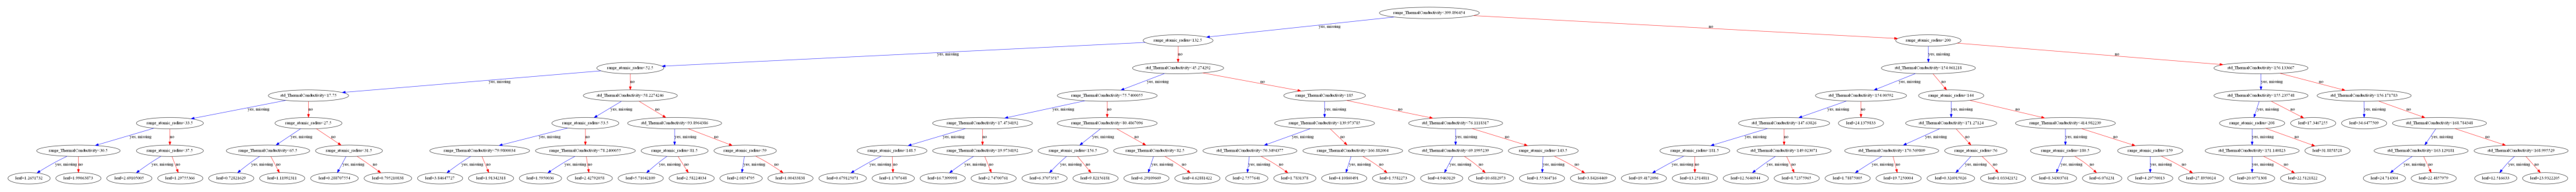

In [58]:
fig, ax = plt.subplots(figsize = (50,100))
plot_tree(ext, ax=ax)
plt.show()

In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers'))
fig.add_trace(go.Scatter(x=y, y=y, mode='lines'))
fig.show('svg')

In [82]:
Xp_select = Xp.iloc[:,:4]

In [83]:
xgbp = xgb.XGBRegressor()
xgbp.fit(Xp_select, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
y_pred = xgbp.predict(Xp_select)
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

10.145874362002141

In [322]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [327]:
new_dat = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y, mat], axis=1)

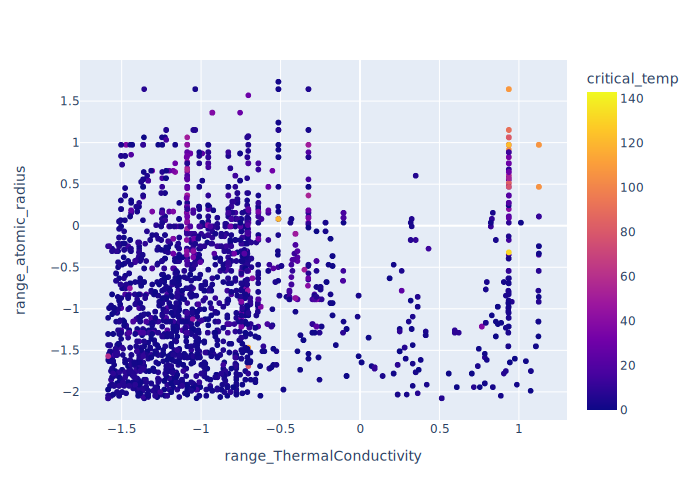

In [368]:
fig = px.scatter(new_dat, x='range_ThermalConductivity', y='range_atomic_radius', color='critical_temp')
fig.show('svg')

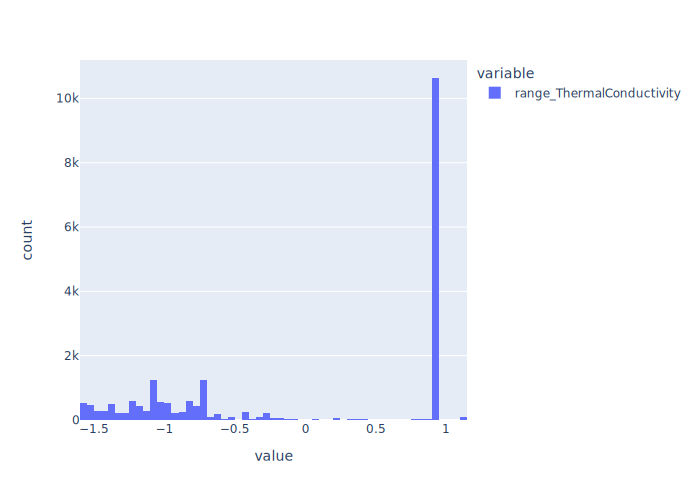

In [374]:
fig = px.histogram(new_dat.range_ThermalConductivity)
fig.show('svg')

In [69]:
steps = [('scaler', StandardScaler()), ('pca', PCA())]
pipeline = Pipeline(steps)
X_scaled_pca = pipeline.fit_transform(X)

In [70]:
Xp = pd.DataFrame(X_scaled_pca, columns=range(81)).add_prefix('component_')
data_pca = pd.concat([Xp, y], axis=1)

In [71]:
Xp

component_0  component_1  component_2  component_3  component_4  \
0        -3.646873     0.997318     3.052424     1.699792     0.245364   
1        -4.537854    -0.212440     1.729394     1.104740     0.982370   
2        -3.470368     1.060658     3.138304     1.797421     0.295871   
3        -3.563578     1.025729     3.091978     1.746827     0.269934   
4        -3.792221     0.954150     2.988256     1.613586     0.198773   
...            ...          ...          ...          ...          ...   
21191     2.375946    -0.394427    -1.459428    -2.425419     2.910382   
21192    -5.429800    -0.777975     1.337469    -0.296237     1.140810   
21193    10.507302    -0.935307     1.570720    -0.378928    -0.224459   
21194     9.800352    -1.000818     1.212286    -0.879662    -0.965775   
21195     3.943218     1.453810    -1.913416     2.660503    -4.112891   

       component_5  component_6  component_7  component_8  component_9  ...  \
0        -0.207705     0.447412    -0.216899    -0.387184     0.234376  ...   
1        -1.008319    -0.263394     0.213796     0.390329    -1.121751  ...   
2        -0.215770     0.481271     0.013810    -0.500398     0.196785  ...   
3        -0.212671     0.462844    -0.105424    -0.442528     0.215027  ...   
4        -0.193545     0.422943    -0.423438    -0.281711     0.274991  ...   
...            ...          ...          ...          ...          ...  ...   
21191    -1.764836     0.083628    -1.038323    -0.184299     1.226977  ...   
21192     0.216315     0.990846    -0.773000     0.323636    -0.810488  ...   
21193    -1.293776    -0.833685     0.054969    -0.730197    -0.338515  ...   
21194    -0.672571    -0.760800    -1.625149     0.139239    -0.065834  ...   
21195     0.119991    -2.970512     0.270210     0.204224     0.089691  ...   

       component_71  component_72  component_73  component_74  component_75  \
0         -0.023222      0.008562     -0.009994      0.002502      0.000648   
1          0.035851      0.095303     -0.020799     -0.029791      0.000119   
2         -0.028156     -0.000245     -0.004249      0.001772     -0.000536   
3         -0.025816      0.004868     -0.007433      0.002178      0.000282   
4         -0.017515      0.013032     -0.013662      0.002893      0.000405   
...             ...           ...           ...           ...           ...   
21191     -0.004989     -0.060597     -0.052955      0.018004      0.026352   
21192     -0.012959     -0.003588      0.009878      0.017683      0.005439   
21193     -0.066361      0.003014      0.008881     -0.018267     -0.001720   
21194     -0.052305      0.003794      0.004884     -0.009249     -0.002176   
21195      0.015417     -0.031610      0.035582      0.007960      0.017477   

       component_76  component_77  component_78  component_79  component_80  
0          0.003490      0.005092     -0.003569      0.005681     -0.004747  
1          0.021689      0.011051     -0.006601      0.001679     -0.004226  
2          0.002273      0.003304     -0.006200      0.004844     -0.005449  
3          0.002891      0.004276     -0.004780      0.005340     -0.005073  
4          0.004615      0.006368     -0.001552      0.006038     -0.004193  
...             ...           ...           ...           ...           ...  
21191      0.024588     -0.017171      0.036887      0.000431     -0.012222  
21192     -0.013528     -0.001823      0.006249     -0.001023     -0.001181  
21193      0.009505      0.013210      0.003779      0.007844      0.001250  
21194      0.009882      0.009459     -0.005594      0.008286      0.002304  
21195     -0.002820      0.006890      0.007493     -0.001612      0.003234  

[21196 rows x 81 columns]

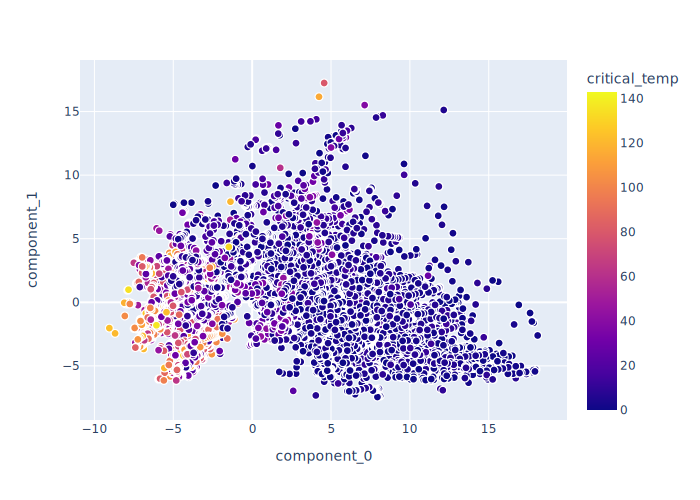

In [366]:
fig = px.scatter(data_pca, x='component_0', y='component_1', color='critical_temp', template='plotly')
fig.update_traces(marker=dict(size=8, line=dict(width=1, color='white')))
fig.show('svg')

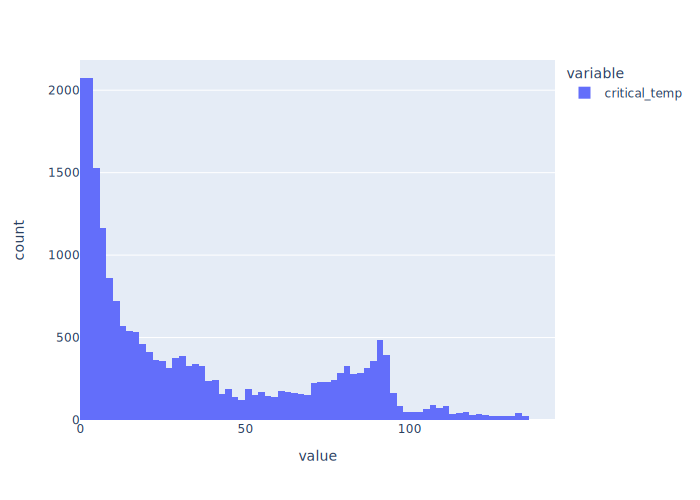

In [375]:
fig = px.histogram(data_pca.critical_temp)
fig.show('svg')

In [30]:
Tc = materials.iloc[:,:-1].corr('kendall').critical_temp

In [169]:
element = Tc[Tc.between(0.1,1, inclusive='neither')].sort_values()
element

Bi    0.119880
Tl    0.134440
Hg    0.170466
Sr    0.243635
Y     0.264637
Ca    0.368939
Ba    0.477267
O     0.547607
Cu    0.616426
Name: critical_temp, dtype: float64

In [317]:
df = data.join(materials.drop('critical_temp', axis=1))

In [159]:
rthermal = df[['critical_temp', 'range_ThermalConductivity', 'range_atomic_radius', 'wtd_mean_atomic_radius',
               'Cu','O','Ba','Ca','Y','Sr','Hg','Tl','Bi']].corr('kendall')

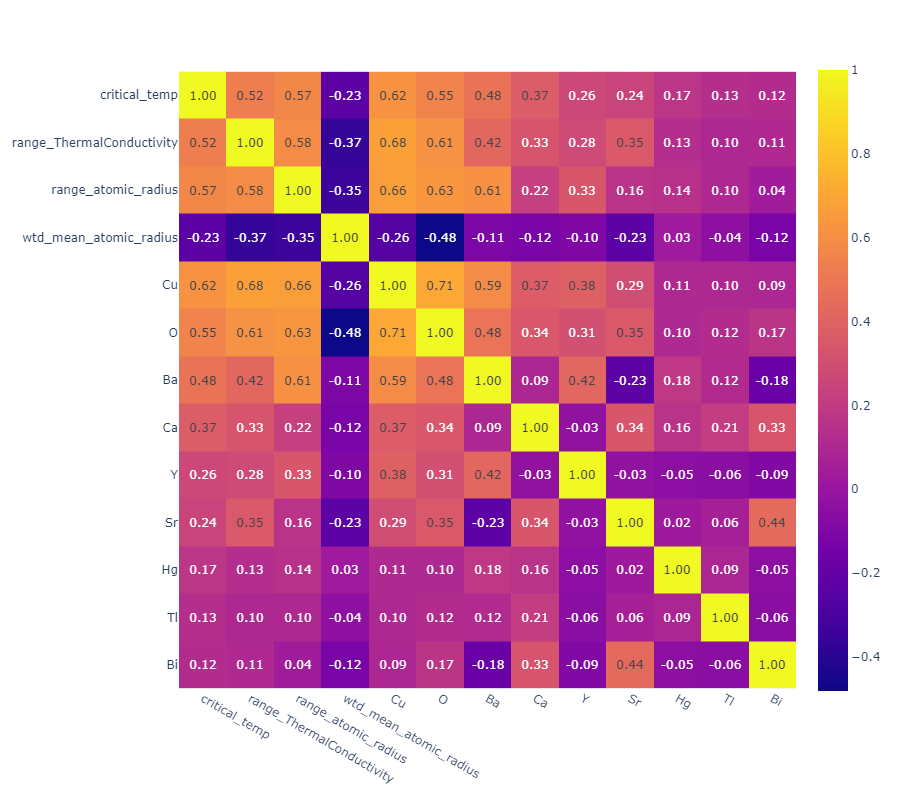

In [160]:
fig = px.imshow(rthermal, text_auto='.2f', width=900, height=800)
fig.show('png')

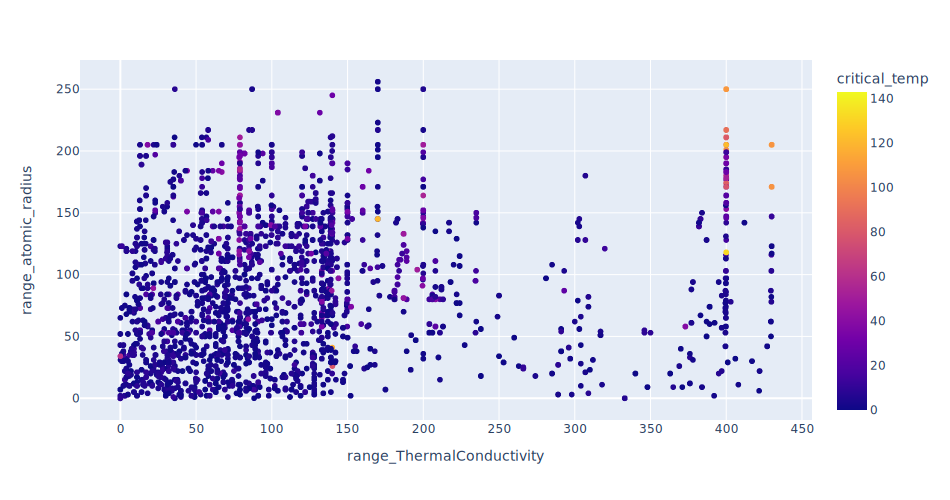

In [155]:
fig = px.scatter(df, x='range_ThermalConductivity', y='range_atomic_radius', color='critical_temp')
fig.update_layout(width=950, height=500)
fig.show('svg')

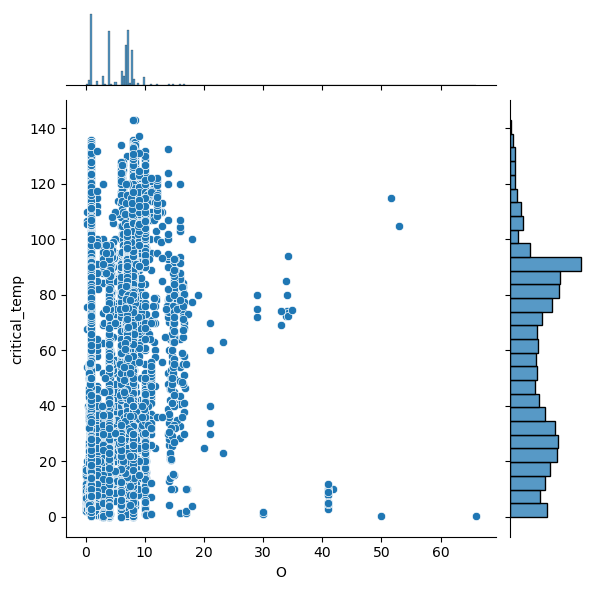

In [167]:
sns.jointplot(df.loc[df.O!=0], x='O', y='critical_temp')
plt.show()

In [118]:
df.query('O<10')[['O', 'critical_temp']].corr('kendall')

O  critical_temp
O              1.000000       0.553711
critical_temp  0.553711       1.000000

In [46]:
single = df.loc[df.number_of_elements==1][['critical_temp','O','Ba','Ca','Y','Sr','Hg','Tl','Bi']].corr('kendall')
single

critical_temp         O        Ba        Ca         Y  \
critical_temp       1.000000 -0.056672 -0.003947  0.138696  0.034033   
O                  -0.056672  1.000000 -0.009416 -0.006120 -0.007930   
Ba                 -0.003947 -0.009416  1.000000 -0.016367 -0.021205   
Ca                  0.138696 -0.006120 -0.016367  1.000000 -0.013783   
Y                   0.034033 -0.007930 -0.021205 -0.013783  1.000000   
Sr                  0.010090 -0.006120 -0.016367 -0.010638 -0.013783   
Hg                  0.006322 -0.008702 -0.023270 -0.015125 -0.019597   
Tl                 -0.099693 -0.011316 -0.030259 -0.019668 -0.025482   
Bi                  0.067995 -0.009416 -0.025180 -0.016367 -0.021205   

                     Sr        Hg        Tl        Bi  
critical_temp  0.010090  0.006322 -0.099693  0.067995  
O             -0.006120 -0.008702 -0.011316 -0.009416  
Ba            -0.016367 -0.023270 -0.030259 -0.025180  
Ca            -0.010638 -0.015125 -0.019668 -0.016367  
Y             -0.013783 -0.019597 -0.025482 -0.021205  
Sr             1.000000 -0.015125 -0.019668 -0.016367  
Hg            -0.015125  1.000000 -0.027965 -0.023270  
Tl            -0.019668 -0.027965  1.000000 -0.030259  
Bi            -0.016367 -0.023270 -0.030259  1.000000

In [125]:
df.loc[df.number_of_elements==1].critical_temp.mean()

5.187997105263158

In [376]:
elem_prop = []
share = []
for i in materials.iloc[:,:-2].columns:
    elem_prop.append(df.loc[df[i]!=0].iloc[:,:82].mean())
    share.append((materials[i]!=0).mean())
element_prop = pd.concat(elem_prop, axis=1)
element_prop.columns = materials.iloc[:,:-2].columns

In [377]:
element_prop = element_prop.T

In [378]:
element_prop['share'] = 100*np.array(share)
element_prop

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
H             4.483221         50.773684             50.706324   
Li            4.009646         45.625471             45.555100   
Be            2.750000         61.289229             32.775597   
B             3.695183         57.416146             46.865879   
C             3.781300         58.208933             47.770629   
..                 ...               ...                   ...   
Au            2.733333        138.763218            134.783243   
Hg            5.233412        104.310552             75.781978   
Tl            5.221366        108.631890             82.223884   
Pb            5.355662        119.050868             95.238498   
Bi            5.276498        102.275164             85.477692   

    gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
H           20.471997              27.978242             1.020906   
Li          26.950977              28.614865             0.983905   
Be          33.367640              21.342570             0.571627   
B           36.171679              29.092388             0.968529   
C           36.609538              31.106347             0.945592   
..                ...                    ...                  ...   
Au         123.921498             124.361282             0.829978   
Hg          77.301040              53.829767             1.370807   
Tl          84.414364              63.360397             1.362893   
Pb          95.673757              77.932533             1.400639   
Bi          77.038729              62.017276             1.361434   

    wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
H                  0.936453         114.847393              29.862466   
Li                 0.876793          98.334155              27.715100   
Be                 0.666386         109.539151              19.835364   
B                  0.898732         105.137278              26.462315   
C                  0.872601         110.377403              27.065702   
..                      ...                ...                    ...   
Au                 0.681393         114.909078              71.226896   
Hg                 1.390500         179.478206              27.042404   
Tl                 1.371411         170.680753              30.974114   
Pb                 1.340179         165.644764              39.274721   
Bi                 1.277644         182.090739              38.943040   

    std_atomic_mass  ...  gmean_Valence  wtd_gmean_Valence  entropy_Valence  \
H         43.088850  ...       2.175254           2.468555         1.313367   
Li        39.039628  ...       2.212723           2.455938         1.202187   
Be        49.772621  ...       2.957180           2.501504         0.835881   
B         43.609435  ...       3.115179           3.104059         1.220592   
C         45.914239  ...       3.212371           3.285094         1.210381   
..              ...  ...            ...                ...              ...   
Au        52.089566  ...       4.239225           4.338238         0.920979   
Hg        66.398766  ...       2.213287           2.102727         1.568668   
Tl        62.867643  ...       2.463342           2.385668         1.561407   
Pb        63.157146  ...       3.020485           2.918042         1.543950   
Bi        66.816971  ...       2.770274           2.720758         1.526715   

    wtd_entropy_Valence  range_Valence  wtd_range_Valence  std_Valence  \
H              1.075954       3.369128           1.449419     1.294386   
Li             0.986423       3.392283           1.393814     1.301752   
Be             0.599067       2.562500           1.514687     1.210885   
B              1.003990       2.131229           1.500818     0.874708   
C              1.003784       2.118067           1.463739     0.859047   
..                  ...            ...                ...          ...   
Au             0.689116       1.587500

In [379]:
element_prop.corr('kendall').critical_temp['range_ThermalConductivity']

0.6582365003417635

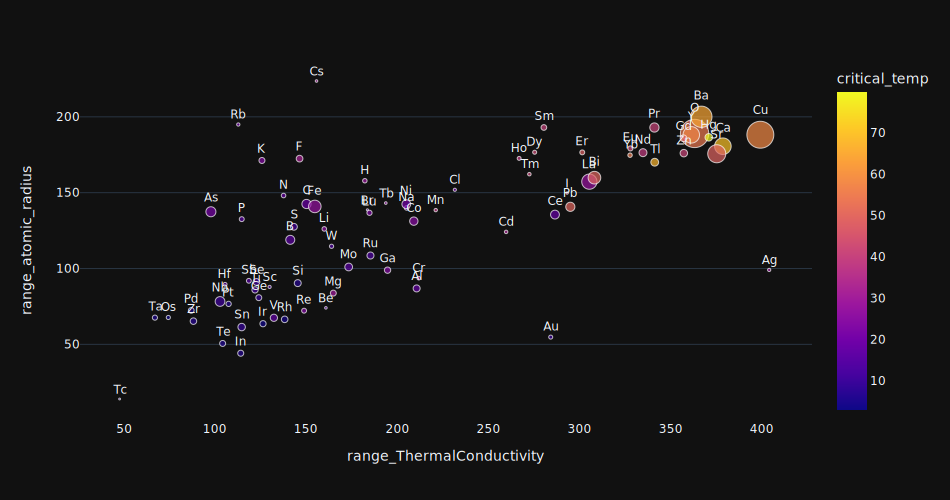

In [381]:
fig = px.scatter(element_prop, x='range_ThermalConductivity', y='range_atomic_radius', color='critical_temp', 
                 size='share', text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.update_layout(width=950, height=500)
fig.show('svg')

In [297]:
fig = px.scatter(element_prop, x='range_ThermalConductivity', y='critical_temp', size='share',
                 text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_layout(width=950, height=500)
fig.show()

In [299]:
fig = px.scatter(element_prop, x='range_atomic_radius', y='critical_temp', size='share',
                 text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.update_layout(width=950, height=500)
fig.show()

In [301]:
fig = px.scatter(element_prop, x='wtd_mean_atomic_radius', y='critical_temp', size='share',
                 text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.update_layout(width=950, height=500)
fig.show()

In [303]:
fig = px.scatter(element_prop, x='mean_atomic_radius', y='critical_temp', size='share',
                 text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.update_layout(width=950, height=500)
fig.show()

In [307]:
fig = px.scatter(element_prop, x='number_of_elements', y='critical_temp', size='share',
                 text=element_prop.index, template='plotly_dark')
fig.update_traces(textposition='top center',marker=dict(line=dict(width=1, color='white')), 
                  selector=dict(type='scatter'))
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)
fig.update_layout(width=950, height=500)
fig.show()